<a href="https://colab.research.google.com/github/abdullahhabib6/AI-TRASH-TINYML-ARDNANO33/blob/main/GarbageClassificationMobileNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import concurrent.futures


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model, regularizers
# Various Layers that can be part of the network
from tensorflow.keras.layers import (Conv2D, ZeroPadding2D, Activation, Input,
                                     SeparableConv2D, BatchNormalization,
                                     MaxPooling2D, AveragePooling2D, Lambda,
                                     Flatten, Dense,Dropout)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 img_to_array)
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import datetime
import matplotlib.image as image
from PIL import Image
from tensorflow.keras.losses import BinaryCrossentropy
%matplotlib inline
import concurrent.futures as multi
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

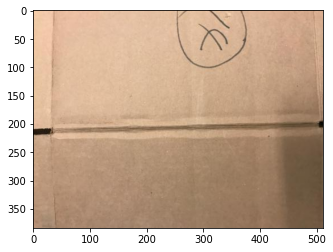

In [4]:
DATADIR = '/content/drive/My Drive/GarbageClassification'
CATEGORIES = ["cardboard" , "glass" , "metal" , "paper" , "plastic", "trash"]

for category in CATEGORIES:
    path = os.path.join(DATADIR , category) #path to the fire or non-fire directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        break
    break

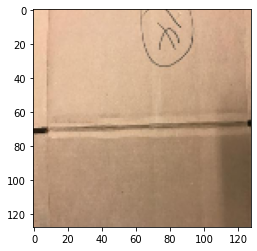

In [5]:
IMG_WIDTH = IMG_HEIGHT = 128
DEPTH = 3
BATCH_SIZE = 32
EPOCHS = 10
shuffle = False
new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
plt.imshow(new_rgb)
plt.show()


In [6]:
training_data = [] 
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR , category) 
        class_num = CATEGORIES.index(category)
        import matplotlib.image as mpimg
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
                new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_rgb,class_num]) 
            except Exception as e:
                pass


create_training_data()

In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])


In [ ]:
#data_augmentation = tf.keras.Sequential([
     #layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     #layers.experimental.preprocessing.RandomRotation(0.2)])

#augmented_data = []

def augment_training_data():
  for category in CATEGORIES:
    path = os.path.join (DATADIR , category)
    class_num2 = CATEGORIES.index(category)
    import matplotlib.image as mpimg
    for img in os.listdir(path):
      try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
          new_rgb = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
          arrayimg = img_to_array(new_rgb)
          augmented_image = data_augmentation(tf.expand_dims(arrayimg,0))
          augmented_data.append([augmented_image,class_num2])
      except Exception as e:
          pass
 
#augment_training_data()        

In [7]:
print(len(training_data))
#print(len(augmented_data)) 

2527


In [8]:
import random 

random.shuffle(training_data)
#random.shuffle(augmented_data)

In [9]:
for sample in training_data[:5]:
    print(sample[0])

[[[249 196 182]
  [248 195 181]
  [248 195 181]
  ...
  [245 175 150]
  [244 174 149]
  [244 174 149]]

 [[251 198 184]
  [250 197 183]
  [247 194 180]
  ...
  [244 174 149]
  [244 174 149]
  [244 174 149]]

 [[249 196 182]
  [247 194 180]
  [246 193 179]
  ...
  [243 173 148]
  [244 174 149]
  [244 174 149]]

 ...

 [[106  50  33]
  [105  51  33]
  [104  52  33]
  ...
  [110 118 121]
  [112 120 123]
  [113 121 124]]

 [[103  47  30]
  [100  47  29]
  [ 98  48  29]
  ...
  [110 118 121]
  [112 120 123]
  [113 121 124]]

 [[ 98  45  27]
  [ 94  43  24]
  [ 89  41  21]
  ...
  [110 118 121]
  [112 120 123]
  [113 121 124]]]
[[[193 189 177]
  [194 190 178]
  [190 186 174]
  ...
  [134 129 123]
  [133 128 122]
  [133 128 122]]

 [[196 192 180]
  [194 190 178]
  [190 186 174]
  ...
  [134 129 123]
  [134 129 123]
  [134 129 123]]

 [[195 191 179]
  [191 187 175]
  [187 183 171]
  ...
  [134 129 123]
  [135 130 124]
  [135 130 124]]

 ...

 [[252 252 240]
  [250 250 238]
  [250 250 238]
  ..

In [ ]:
#for sample in augmented_data[:5]:
    #print(sample[0])

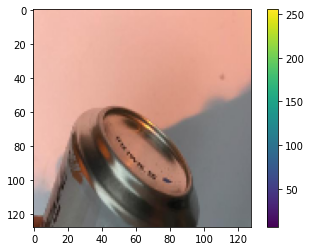

2


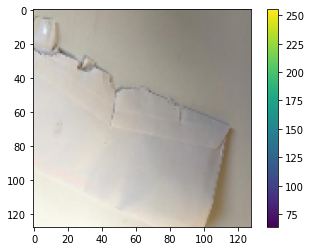

3


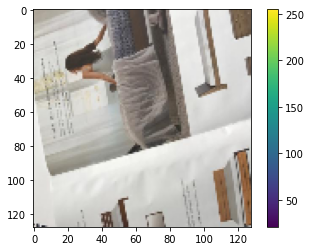

3


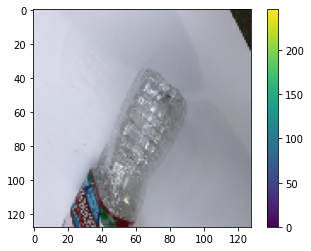

4


In [10]:
for sample in training_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    plt.figure()
    plt.imshow(sample[0]) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(sample[1]) #checking the correctness of the label 

In [ ]:
#augmented_data = np.array(augmented_data).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) 

#for sample in augmented_data[:4]: #Pre-processing of data by saving the data into a single list variable 
    #plt.figure()
    #plt.imshow(np.squeeze(sample[0])) #It provides the original image set at [0] and the resultant set i.e. y(labels) at [1]
    #plt.colorbar(ticks=range(255))
    #plt.grid(False)
    #plt.show()
    #print(sample[1]) #checking the correctness of the label 

In [11]:
shuffle = True
X = [] 
y = []
#A = []
#b = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
y = np.array(y)

#for features, label in augmented_data:
    #A.append(features)
    #b.append(label)
    
#A = np.array(A).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH) #necessary for keeping the dimensions of X as a numpy array
#b = np.array(b)


In [12]:
print(X.shape)
print(y.shape)

#print(A.shape)
#print(b.shape)

(2527, 128, 128, 3)
(2527,)


In [13]:
training_dataset = []
#for i in range(2527):
  #training_dataset.append(A[i])

for j in range(2527):
  training_dataset.append(X[j])


In [14]:
label_dataset = []
for i in range(2527):
  label_dataset.append(y[i])

#for j in range(2527):
  #label_dataset.append(b[i])

In [15]:
print(len(training_dataset))
traini = np.array(training_dataset).reshape(-1, IMG_WIDTH, IMG_HEIGHT, DEPTH)
print(traini.shape)

print(len(label_dataset))
labeli = np.array(label_dataset)
print(labeli.shape)

2527
(2527, 128, 128, 3)
2527
(2527,)


In [16]:
VALIDATION_SPLIT = 0.2
(trainX, validX, trainY, validY) = train_test_split(traini, labeli, test_size= VALIDATION_SPLIT, random_state=42 )

print ('The number of training and validation dataset after split:')
print(trainX.shape)
print(trainY.shape)
print(validX.shape)
print(validY.shape)

The number of training and validation dataset after split:
(2021, 128, 128, 3)
(2021,)
(506, 128, 128, 3)
(506,)


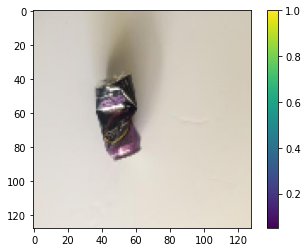

In [17]:
#Displaying A Picture from the Training Set
plt.figure()
plt.imshow(trainX[1]/255)
plt.colorbar()
plt.grid(False)
plt.show()


In [18]:
if shuffle:
  garb_img = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=20,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      horizontal_flip=True,
      #brightness_range=[0.2,1],
      #zoom_range=0.2,
      #featurewise_center=True,
      #featurewise_std_normalization=True,
      #fill_mode = 'nearest'
  )


In [ ]:
#data_augmentation = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  #tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [19]:
train_datasetgen = garb_img.flow(

          trainX, 
          trainY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )

val_datasetgen = garb_img.flow(
          validX, 
          validY, 
          batch_size= BATCH_SIZE,
          shuffle=True,
  )


In [20]:
#Modelling
from tensorflow.keras.applications import MobileNet
mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    #dropout=0.01,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
mobilenet_model.trainable = False # freeze the orignianl layers of the mobilenet model
mn=True

17227776/17225924 [==============================] - 0s 0us/step


In [21]:
mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [22]:
class TransferLearning():
   def modelmn(self):
    X = mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-3, l2=1e-2))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(mobilenet_model.inputs, outputs=X)
    return shorter_model

In [23]:
my_model = TransferLearning()
my_model = my_model.modelmn()
base_learning_rate=0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('2017ee57.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

In [25]:
EPOCHS = 10
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
64/64 [==============================] - 38s 567ms/step - loss: 4.8314 - accuracy: 0.2467 - val_loss: 4.1825 - val_accuracy: 0.3933
Epoch 2/10
64/64 [==============================] - 35s 547ms/step - loss: 4.0759 - accuracy: 0.3748 - val_loss: 3.7938 - val_accuracy: 0.4130
Epoch 3/10
64/64 [==============================] - 35s 549ms/step - loss: 3.6143 - accuracy: 0.4272 - val_loss: 3.4190 - val_accuracy: 0.4605
Epoch 4/10
64/64 [==============================] - 35s 547ms/step - loss: 3.2731 - accuracy: 0.4739 - val_loss: 3.1464 - val_accuracy: 0.5158
Epoch 5/10
64/64 [==============================] - 35s 548ms/step - loss: 2.9725 - accuracy: 0.5576 - val_loss: 2.8911 - val_accuracy: 0.5277
Epoch 6/10
64/64 [==============================] - 35s 547ms/step - loss: 2.6683 - accuracy: 0.6160 - val_loss: 2.6719 - val_accuracy: 0.5988
Epoch 7/10
64/64 [==============================] - 35s 542ms/step - loss: 2.4823 - accuracy: 0.6618 - val_loss: 2.4837 - val_accuracy: 0.6166

In [26]:
ft_mobilenet_model = MobileNet(
    include_top=False, #Most important--last layer is included
    weights="imagenet",
    alpha=1.0,
    dropout=0.001,
    depth_multiplier=1,
    classes=1000,
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation="softmax",)
ft_mobilenet_model.trainable = True # freeze the orignianl layers of the mobilenet model
mn=True

In [27]:
print("Number of layers in the base model: ", len(ft_mobilenet_model.layers))


Number of layers in the base model:  86


In [28]:
# Fine-tune from this layer onwards
fine_tune_at = 82

# Freeze all the layers before the `fine_tune_at` layer
for layer in ft_mobilenet_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [29]:
ft_mobilenet_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [30]:
class TransferLearning2():
   def modelmn2(self):
    X = ft_mobilenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-1))(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-1))(X)
    X = Dense(6,activation='sigmoid')(X)
    shorter_model = Model(ft_mobilenet_model.inputs, outputs=X)
    return shorter_model

In [31]:
my_model = TransferLearning2()
my_model = my_model.modelmn2()
base_learning_rate=0.001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])
mc = ModelCheckpoint('ai_trash_fyp24.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)

In [32]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [33]:
EPOCHS = 30
history = my_model.fit(
    x= train_datasetgen,
    validation_data = val_datasetgen, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/30
64/64 [==============================] - 41s 618ms/step - loss: 17.2798 - accuracy: 0.3434 - val_loss: 4.6340 - val_accuracy: 0.4980
Epoch 2/30
64/64 [==============================] - 37s 576ms/step - loss: 3.9662 - accuracy: 0.6061 - val_loss: 3.9037 - val_accuracy: 0.6265
Epoch 3/30
64/64 [==============================] - 37s 574ms/step - loss: 3.4754 - accuracy: 0.7496 - val_loss: 3.2065 - val_accuracy: 0.7134
Epoch 4/30
64/64 [==============================] - 37s 575ms/step - loss: 2.7990 - accuracy: 0.8032 - val_loss: 2.6182 - val_accuracy: 0.7668
Epoch 5/30
64/64 [==============================] - 37s 576ms/step - loss: 2.3021 - accuracy: 0.8516 - val_loss: 2.3956 - val_accuracy: 0.8024
Epoch 6/30
64/64 [==============================] - 37s 579ms/step - loss: 2.1302 - accuracy: 0.8561 - val_loss: 2.1290 - val_accuracy: 0.7787
Epoch 7/30
64/64 [==============================] - 37s 584ms/step - loss: 1.6807 - accuracy: 0.9121 - val_loss: 1.8051 - val_accuracy: 0.796

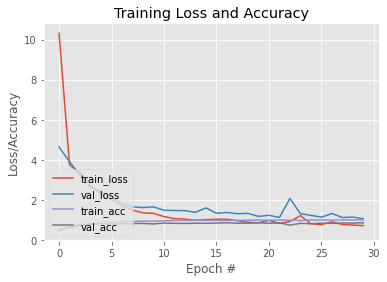

In [34]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [35]:
tflite_model_name = 'garbagemn_model'
tflite_model_name_no_quant = 'garbagemn_model_noquant'
c_model_name = 'garbagemn_model'

# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(my_model)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(tflite_model_name_no_quant + '.tflite', "wb").write(model_no_quant_tflite)

def representative_dataset():
  for i in range(2021):
      data = np.random.rand(1, 128, 128, 3)
      yield [data.astype(np.float32)]
converter=tf.lite.TFLiteConverter.from_keras_model(my_model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdg3lreuc/assets
INFO:tensorflow:Assets written to: /tmp/tmp64vfrrm0/assets


INFO:tensorflow:Assets written to: /tmp/tmp64vfrrm0/assets


3862488

In [36]:
size_original_tf = os.path.getsize('ai_trash_fyp24.h5')
size_tf = os.path.getsize(tflite_model_name + '.tflite')
size_no_quant_tflite = os.path.getsize(tflite_model_name_no_quant + '.tflite')

In [37]:
import pandas as pd
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_original_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_original_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tf} bytes", f"(reduced by {size_no_quant_tflite - size_tf} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,24748856 bytes,
TensorFlow Lite,13850316 bytes,(reduced by 10898540 bytes)
TensorFlow Lite Quantized,3862488 bytes,(reduced by 9987828 bytes)


In [38]:
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  c_str += '#ifndef' + var_name.upper() + '_H\n'
  c_str += '#define' + var_name.upper() + '_H\n\n'

  c_str += '\nunsigned int' + var_name + '_len =' + str(len(hex_data)) + ';\n'

  c_str += 'unsigned char' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    hex_str = format(val, '#04x')

    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n'
    hex_array.append(hex_str)

    c_str += '\n' + format(' '.join(hex_array)) + '\n};\n\n'
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str
    

In [39]:
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))